# Tensorflow 2.0 Variables

This notebook will teach you about variables and how to build a basic computation graph.

We will perform gradient descent manually to optimize a simple function.

If you're familiar with Tensorflow 1.x, you will find this useful as an example to demonstrate how we can do the same operations, but without sessions, initializers, etc.

In [3]:

import tensorflow as tf
print(tf.__version__)

2.0.0


In [4]:
# First, what is the difference between mutable and immutable?

# A tuple is immutable
# This should result in an error
a = (1,2,3)
# a[0] = 5

In [5]:
# A list is mutable
a = [1,2,3]
a[0] = 5
print(a)

[5, 2, 3]


In [6]:
# Now Tensorflow variables
a = tf.Variable(5.)
b = tf.Variable(3.)
print(a * b)

# Eager execution! No need for session.run() or variable initializer

tf.Tensor(15.0, shape=(), dtype=float32)


In [7]:
# Because it's a variable, it can be updated
a = a + 1
print(a)

tf.Tensor(6.0, shape=(), dtype=float32)


In [8]:
# Variables and constants
c = tf.constant(4.)
print(a * b + c)

tf.Tensor(22.0, shape=(), dtype=float32)


In [9]:
# Let's demonstrate a simple optimization problem
# L(w) = w**2

w = tf.Variable(5.)

# Now, let us define a loss function
def get_loss(w):
  return w ** 2

# Use "gradient tape" to record the gradients
def get_grad(w):
  with tf.GradientTape() as tape:
    L = get_loss(w)

  # Get the gradient
  g = tape.gradient(L, w)
  return g
  

# Define an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


# Store the losses
losses = []

# Perform gradient descent
for i in range(50):
  g = get_grad(w)
  optimizer.apply_gradients(zip([g], [w])) #   w.assign(w - 0.1 * 2 * w)

  losses.append(get_loss(w))


Final loss: 5.0925916816879635e-09


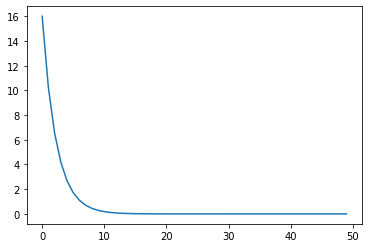

In [10]:
import matplotlib.pyplot as plt
plt.plot(losses)
print(f"Final loss: {get_loss(w)}")

In [11]:
# Let's do the same thing again, but manually

w = tf.Variable(5.)

# Store the losses
losses2 = []

# Perform gradient descent
for i in range(50):
  # This is doing: w = w - 0.1 * 2 * w
  # But we don't want to create a new Tensor
  w.assign(w - 0.1 * 2 * w)
  losses2.append(w ** 2)

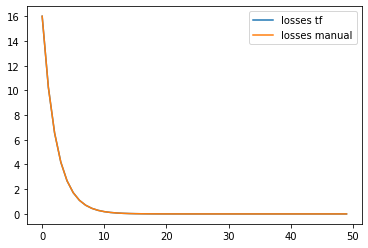

In [12]:
plt.plot(losses, label="losses tf")
plt.plot(losses2, label="losses manual")
plt.legend()